<a href="https://colab.research.google.com/github/Jud-et/Machine-Learning/blob/main/Tweet_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Call me : Judith
#  lets do some Tweet mining

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
# Import NLTK and download stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load Data
data = pd.read_csv('/content/labeled_data.csv')

In [ ]:
# Exploring Data
print(data.head())
print(data.info())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24

In [ ]:
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization and removal of stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

In [ ]:
#tweet being the text column
data['clean_tweet'] = data['tweet'].apply(lambda x: preprocess_text(x))



# **Text Visualization**

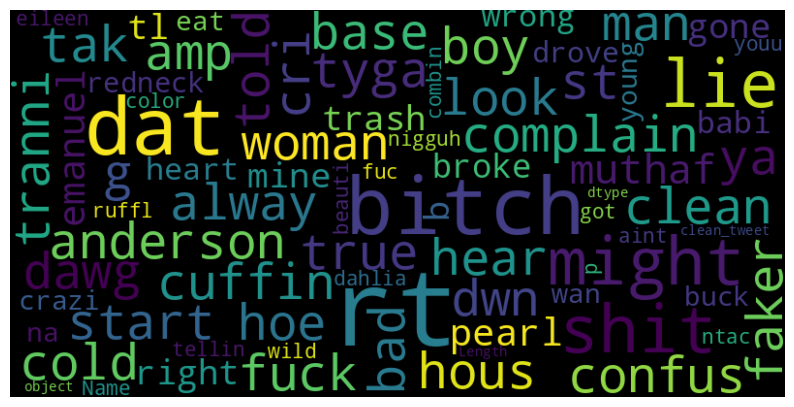

In [ ]:

# Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(str(data['clean_tweet']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Feature Extraction
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['clean_tweet']).toarray()
y = data['hate_speech']

In [ ]:
X = data['clean_tweet']
y = data['hate_speech']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert 'clean_tweet' to a list
X_train_list = X_train.astype(str).tolist()


In [ ]:
#Choose a Model
model = MultinomialNB()

In [ ]:
# Creates a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
# Train the pipeline
model.fit(X_train_list, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7932217066774259
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      3967
           1       0.26      0.06      0.09       681
           2       0.17      0.02      0.04       253
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1

    accuracy                           0.79      4957
   macro avg       0.21      0.18      0.17      4957
weighted avg       0.70      0.79      0.73      4957

Confusion Matrix:
 [[3889   63   13    2    0    0]
 [ 632   38   11    0    0    0]
 [ 207   40    5    1    0    0]
 [  43    8    1    0    0    0]
 [   3    0    0    0    0    0]
 [   1    0    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!jupyter nbconvert --to html Tweet_mining.ipynb

[NbConvertApp] Converting notebook Tweet_mining.ipynb to html
[NbConvertApp] Writing 884932 bytes to Tweet_mining.html
